In [147]:
from RLSwitch import RLSwitchEnv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from dqn import DQN

# DQN Implementation
from collections import deque


In [16]:
# Environment Setup
n = 3 # nxn
end_t = 20 # number of time steps to end an episode after
env = RLSwitchEnv(n,end_t, lambdaMatrix = None)

In [17]:
# DQN setup
gamma   = 0.9
epsilon = .95
dqn_agent = DQN(env=env)

In [118]:
gamma   = 0.9
epsilon = .95
trials  = 10
steps = []
for trial in tqdm(range(trials)):
    env.reset() # Reset between each trial
    cur_state = env.state # Get the current state
#     for step in tqdm(range(end_t)): # Till the particular run ends
    for step in range(end_t): # Till the particular run ends
        action = dqn_agent.act(cur_state) # Get the action
#         env.render()
        new_state, reward, done, _ = env.step(action) # Get the rewards
#         print(reward)
        dqn_agent.remember(cur_state, action, 
            reward, new_state, done) # Store the states
        dqn_agent.replay() # Learng
        dqn_agent.target_train() # train target
        cur_state = new_state # set new state
        if done:
            break






  0%|          | 0/5 [00:00<?, ?it/s]




 20%|██        | 1/5 [00:27<01:48, 27.03s/it]




 40%|████      | 2/5 [00:53<01:20, 26.92s/it]




 60%|██████    | 3/5 [01:20<00:53, 26.78s/it]




 80%|████████  | 4/5 [01:46<00:26, 26.74s/it]




100%|██████████| 5/5 [02:13<00:00, 26.77s/it]


In [144]:
dqn_agent.save_model("models/1stdqn")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/1stdqn/assets


In [145]:
n = 3 # nxn
end_t = 20 # number of time steps to end an episode after
env = RLSwitchEnv(n,end_t, lambdaMatrix = None)

In [150]:
# Environment
n = 3 # nxn
end_t = 100 # number of time steps to end an episode after
env = RLSwitchEnv(n,end_t, lambdaMatrix = None)
# test settings

tests = 100
rewards = np.zeros((tests,end_t))


for i in tqdm(range(0,tests)):
    env.reset()
    for j in range(0,end_t):
        action = dqn_agent.act(env.state)
        observation, reward, done, info = env.step(action)
        rewards[i][j] = reward
        if done:
            env.reset()


In [151]:
# Environment
n = 3 # nxn
end_t = 100 # number of time steps to end an episode after
env = RLSwitchEnv(n,end_t, lambdaMatrix = None)
# test settings

tests = 100
rewardsRandom = np.zeros((tests,end_t))


for i in tqdm(range(0,tests)):
    env.reset()
    for j in range(0,end_t):
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        rewardsRandom[i][j] = reward
        if done:
            env.reset()


In [159]:
avgRandom = np.average(rewardsRandom,axis=1)
avgDQN = np.average(rewards,axis=1)

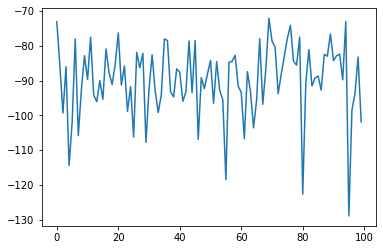

In [160]:
plt.plot(avgDQN)
plt.